## This part of the assignment focuses on the Exploratory Data Analysis

In [1]:
import dask.dataframe as dd
import dask.array as da
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from dask.multiprocessing import get
plotly.tools.set_credentials_file(username='antoinemoyroud', api_key='776hUGoHev14yODJtd0Y')

### Creating a new dataset
From the online open data platform of the bikesharing service in Washington D.C., we thought it it would be relevant to add further information to our EDA analysis. Indeed, as we chose to represent a consultancy, the idea was to lay down all the possible things we could do. By gathering additional information on bike IDs and locations we were able to enhance our analysis.

In [2]:
# import pandas as pd
# import glob, os
 
# os.chdir("C:/Users/antoi/Documents/IE - MBD/Python/tripdata")
# results = pd.DataFrame([])
 
# for counter, file in enumerate(glob.glob("201*")):
#     namedf = pd.read_csv(file, usecols=[0,1,2,3,4,5,6,7,8])
#     results = results.append(namedf)
 
# results.to_csv('C:/Users/antoi/Documents/IE - MBD/Python/combinedfile.csv')

In [23]:
day_df=dd.read_csv(
    "https://gist.githubusercontent.com/catyselman/722f6bb3526526332d0ae42a4ce493c0/raw/06be55e2678bc969c5b63f0e5478df6f2fcbd234/bikeshare_day.csv")
data=dd.read_csv(
    "https://gist.githubusercontent.com/catyselman/9353e4e480ddf2db44b44a79e14718b5/raw/ded23e586ca5db1b4a566b1e289acd12ebf69357/bikeshare_hourly.csv")

ValueError: Cannot seek since size of file is not known

We transformed the data types to perform our analysis

In [9]:
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['hr'] = data.hr.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')

### Adjusting the data to make it understandable in the visualisations
Data had either been normalised or set to seconds making the information less interpretable.
We adjusted to the real temperature by checking the max temperature which was 41°C in the 2011-2012 period in Washington.

In [10]:
data['realtemp']=(data.temp*41)

## Difference in Consumption of Bikesharing Services on Working Days and Weekends
This plot below serves to highlight the difference in the nature of bike consumption over the couse of the week. As you can see below, during working days we can clearly see commuting patterns where users take the bikes at peak commuting hours from 7h to 9h and 17h to 19h. On the other hand, when looking at the weekends, the pattern seems to be far more "leasure-ly", people are taking bikes during the day and peaks of usage are in the middle of the day.

C:\Users\antoi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



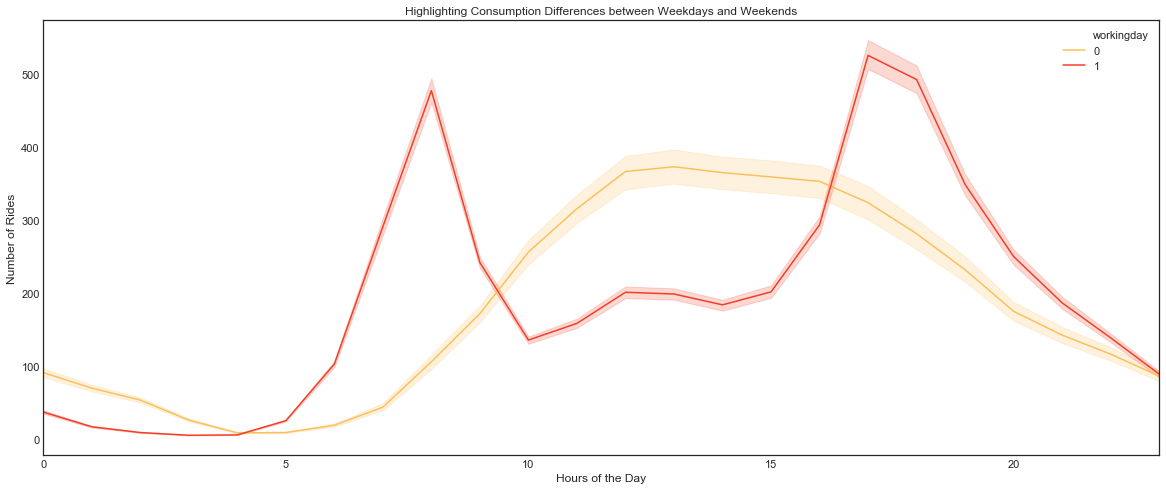

In [15]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=data[['hr',
                       'cnt',
                       'workingday']].compute(),
            palette="YlOrRd",
            x='hr', 
            y='cnt',
            hue='workingday', 
            ax=ax,
            )
ax.margins(x=0)
ax.set(title="Highlighting Consumption Differences between Weekdays and Weekends", 
       xlabel='Hours of the Day', 
       ylabel='Number of Rides')
plt.savefig('pythonproject')

## Showing the seasonality and increasing consumption of Bike Sharing from 2011 to 2012
Here we are showing how much bike sharing usage has increased from 2011 to 2012, while the number of bikes had increased over the period it does not single handedly explain this increase. We attribute this growth to the rise in awareness of alternative mobility services such as bikesharing platforms.

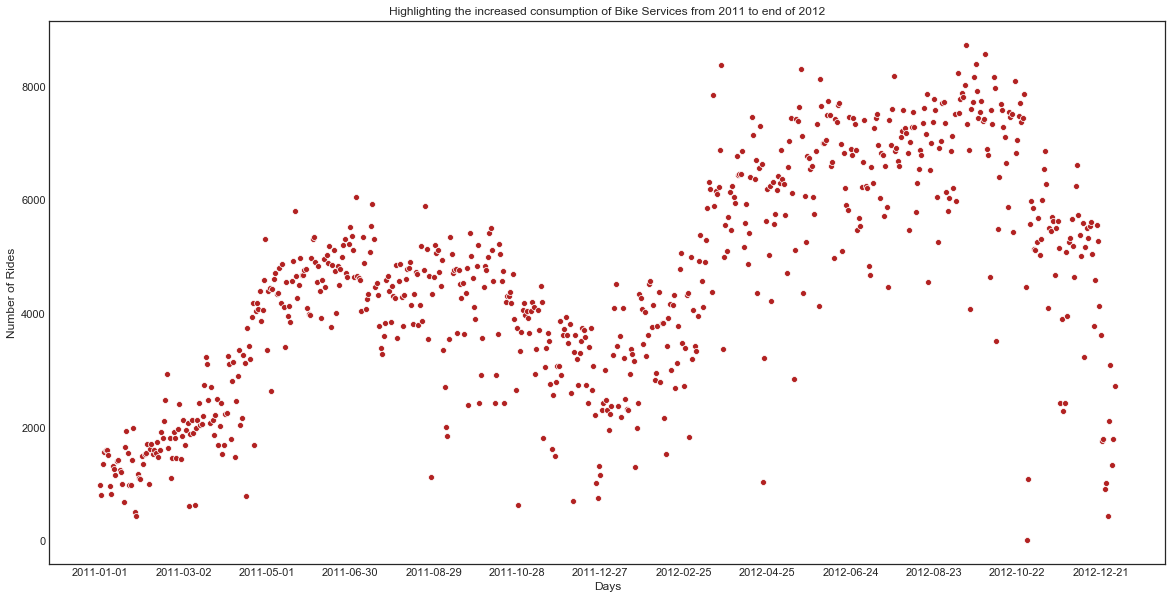

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data=day_df[['dteday',
                       'cnt',
                       'workingday']].compute(),
            x='dteday', y='cnt', ax=ax,
              color="firebrick")
ax.set(title="Highlighting the increased consumption of Bike Services from 2011 to end of 2012", 
       xlabel='Days', 
       ylabel='Number of Rides')
ax.xaxis.set_major_locator(ticker.MaxNLocator(15))
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

## Temperature vs Count plot 
In this specific plot we highlight the pattern in bike usage when plotted against temperature. As expected bike sharing usage increases and peaks in the 25 to 30 degrees Celsius range. It then decreases as the temperatures rise higher.

Text(0, 0.5, 'Count of Rides')

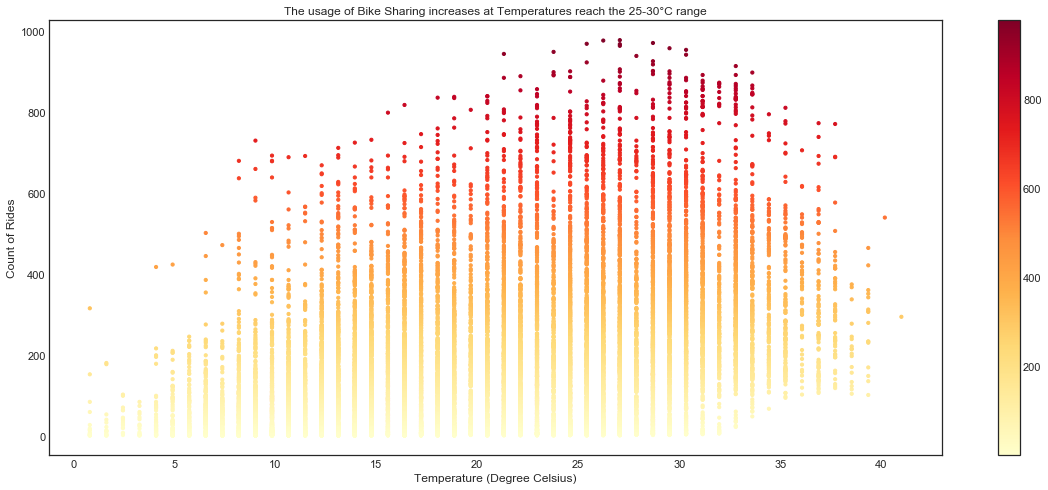

In [18]:
# cmap = sn.cubehelix_palette(as_cmap=True)
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(20,8))
points = ax.scatter(data.realtemp.compute(), data.cnt.compute(), c=data.cnt.compute(), s=10, cmap="YlOrRd")
fig.colorbar(points)
plt.title("The usage of Bike Sharing increases at Temperatures reach the 25-30°C range")
plt.xlabel("Temperature (Degree Celsius)")
plt.ylabel("Count of Rides")

## Boxplots of how weather elements (Humidity, Wind and Temperature) impact Bike Sharing
After making our first discovery with the temperatures we tried to identify patterns with the other natural elements such as humidity and wind. While humidity does not seem to have any major effect on consumption habits we do notice that as the wind increases, users fall back to other transportation options.

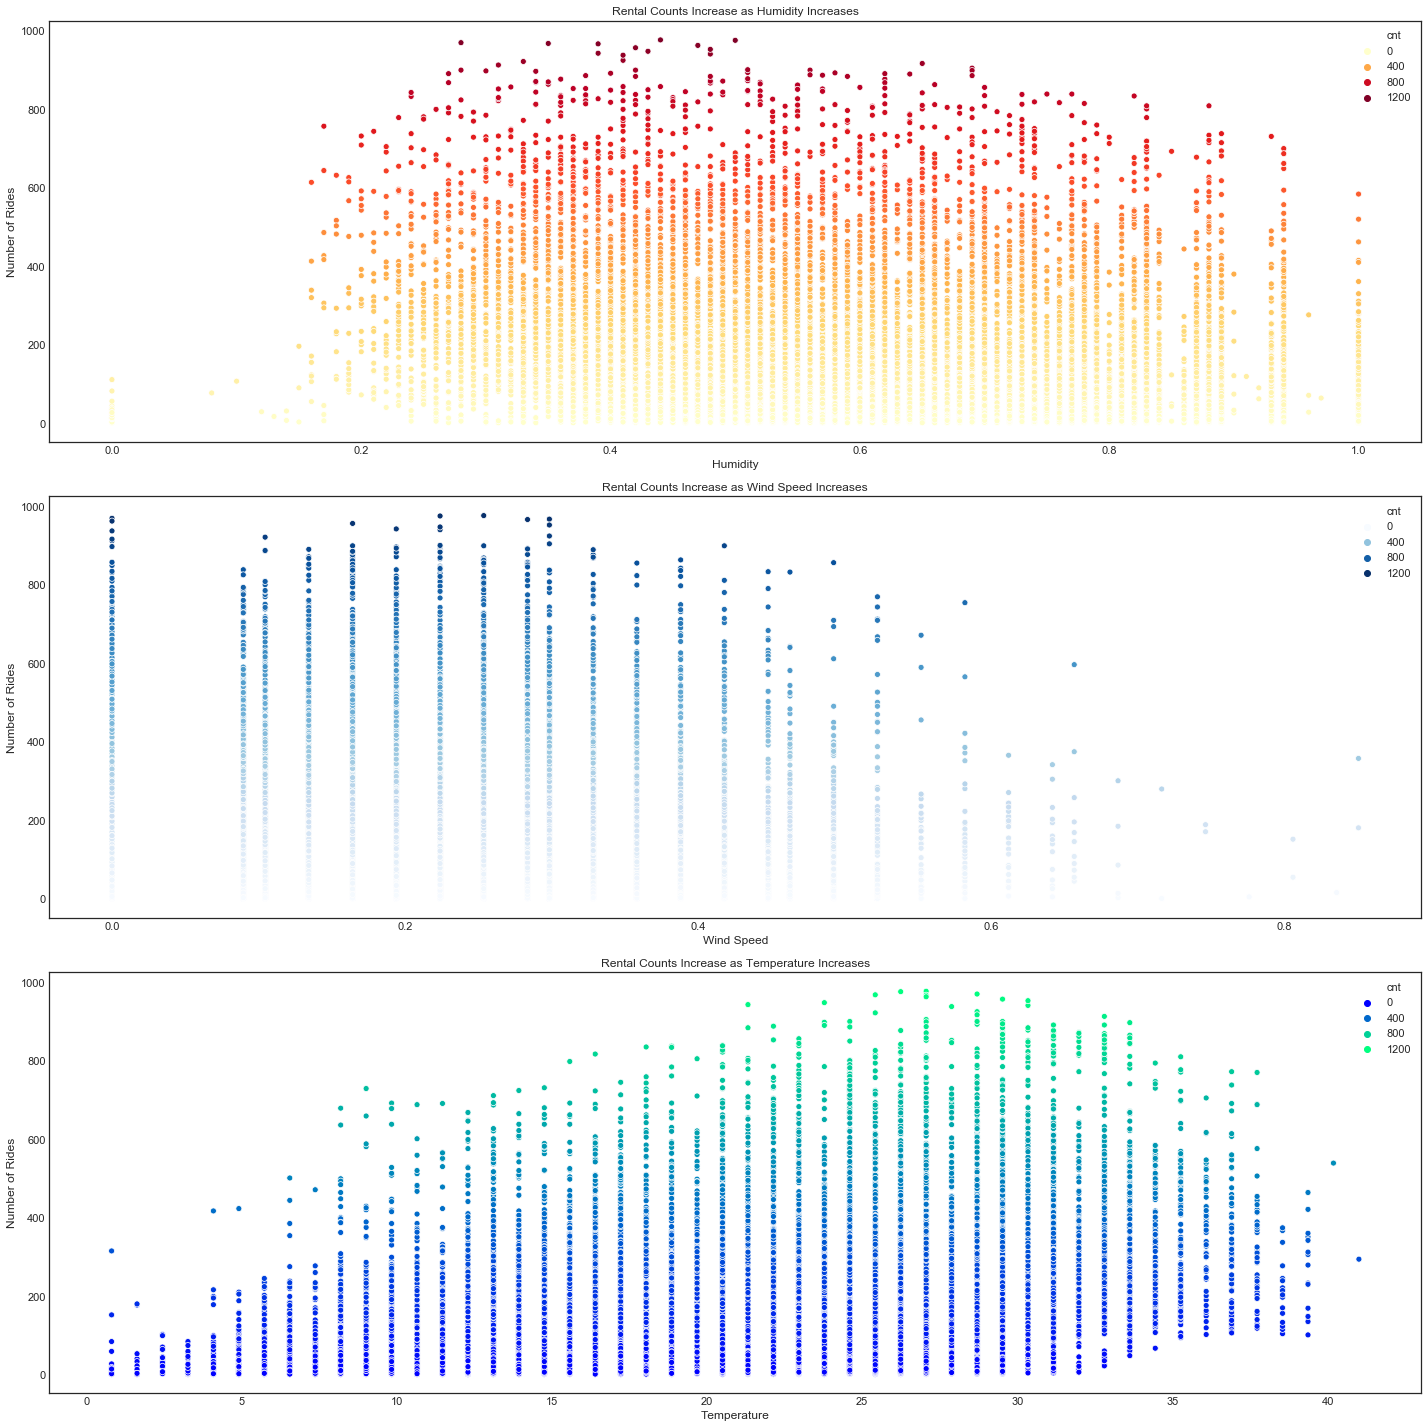

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(20,20))

#Plotting Humidity
sns.scatterplot(data=data[['cnt',
                       'hum',
                       'windspeed']].compute(),
            x='hum', y='cnt',
            hue='cnt', ax=ax1,
              palette="YlOrRd")
ax1.set(title="Rental Counts Increase as Humidity Increases", 
       xlabel='Humidity', 
       ylabel='Number of Rides')

#Plotting Windspeed
sns.scatterplot(data=data[['cnt',
                       'hum',
                       'windspeed']].compute(),
                x='windspeed', y='cnt',
            hue='cnt', ax=ax2,
              palette="Blues")
ax2.set(title="Rental Counts Increase as Wind Speed Increases", 
       xlabel='Wind Speed', 
       ylabel='Number of Rides')

#Plotting Temperature
sns.scatterplot(data=data[['cnt',
                       'hum',
                       'realtemp']].compute(),
            x='realtemp', y='cnt',
            hue='cnt', ax=ax3,
              palette="winter")
ax3.set(title="Rental Counts Increase as Temperature Increases", 
       xlabel='Temperature', 
       ylabel='Number of Rides')
fig.tight_layout()

## Plotly Graph
Finally, we put together a plotly graph to add interaction to our graph which showed how the number of rides increased in line with the rise of temperatures up to the 25°C-30°C range.

In [21]:
trace1 = go.Scatter(
    x = data.realtemp,
    y = data.cnt,
    mode='markers',
    marker=dict(
        size=4,
        color = data.cnt, #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)

chart = [trace1]
fig = go.Figure(data=chart)

py.iplot(chart, filename='scatter-plot-with-colorscale')

C:\Users\antoi\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

